In [82]:
import numpy as np
from scipy.stats import bernoulli, chi2_contingency

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

In [44]:
def trials(p, n, size):
    return np.array([trial_successes(p, n) for _ in range(size)])

def trial_successes(p, n):
    return bernoulli.rvs(p, size=n).sum()

def p_value(a, b, correction=False):
    
    ctable = np.array([a, b])
    ctable[:, 1] = ctable[:, 1] - ctable[:, 0]
    _, p, _, _ = chi2_contingency(ctable, correction)
    return p

    

In [81]:
N = 10000
Nr = range(N)
df = pd.DataFrame(dict(Ax=trials(0.1, 100, N), 
                       An=[100 for _ in Nr], 
                       Bx=trials(0.1, 100, N), 
                       Bn=[100 for _ in Nr]))



def testdf(x):
    a = (x.Ax, x.An)
    b = (x.Bx, x.Bn)
    return p_value(a, b)
    
    
df['p'] = df.apply(testdf, axis=1)

for x in ['An', 'Ax', 'Bn', 'Bx']:
    df[x] = df[x].cumsum()

df['pcs'] = df.apply(testdf, axis=1)

print(df.head())
print(df.tail())

    An  Ax   Bn  Bx         p       pcs
0  100  11  100   8  0.469392  0.469392
1  200  22  200  14  0.204886  0.162199
2  300  30  300  25  0.469392  0.479317
3  400  44  400  34  0.267757  0.233312
4  500  58  500  45  0.521245  0.176224
           An     Ax       Bn      Bx         p       pcs
9995   999600  99940   999600  100259  0.059346  0.452307
9996   999700  99948   999700  100269  0.621189  0.449498
9997   999800  99958   999800  100277  0.621189  0.452348
9998   999900  99968   999900  100295  0.103043  0.441122
9999  1000000  99981  1000000  100303  0.248780  0.448162


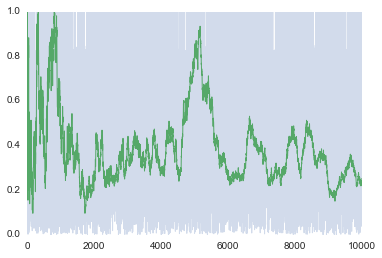

In [80]:
plt.plot(df.p, linewidth=1, alpha=0.25);
plt.plot(df.pcs, linewidth=1);

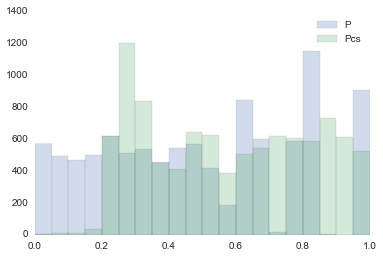

In [92]:
plt.hist(df.p, bins=np.linspace(0, 1, num=21), alpha=0.25, label="P");
plt.hist(df.pcs, bins=np.linspace(0, 1, num=21), alpha=0.25, label="Pcs");
plt.legend();

In [90]:
np.linspace(0, 1, num=21)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])